<a href="https://colab.research.google.com/github/christianiturnip/EndTermTask---Christiani-Turnip---2206130694/blob/main/EndTermTask_ADL_CHRISTIANI_TURNIP_2206130694.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 60.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.83MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.2MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.28MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/50 | D Loss: 0.0158 | G Loss: 4.8486
Epoch 2/50 | D Loss: 0.3428 | G Loss: 2.5672
Epoch 3/50 | D Loss: 1.4749 | G Loss: 1.3059
Epoch 4/50 | D Loss: 0.4426 | G Loss: 4.7350
Epoch 5/50 | D Loss: 0.0523 | G Loss: 4.3299
Epoch 6/50 | D Loss: 0.1142 | G Loss: 5.9361
Epoch 7/50 | D Loss: 0.1082 | G Loss: 5.2235
Epoch 8/50 | D Loss: 0.1009 | G Loss: 3.5653
Epoch 9/50 | D Loss: 0.2115 | G Loss: 5.5942
Epoch 10/50 | D Loss: 0.0263 | G Loss: 4.8992
Epoch 11/50 | D Loss: 0.1895 | G Loss: 6.0533
Epoch 12/50 | D Loss: 0.0162 | G Loss: 6.8667
Epoch 13/50 | D Loss: 0.0016 | G Loss: 6.8805
Epoch 14/50 | D Loss: 0.0071 | G Loss: 7.9591
Epoch 15/50 | D Loss: 0.2158 | G Loss: 11.3156
Epoch 16/50 | D Loss: 0.0600 | G Loss: 5.5141
Epoch 17/50 | D Loss: 0.0202 | G Loss: 6.5133
Epoch 18/50 | D Loss: 0.0032 | G Loss: 6.3567
Epoch 19/50 | D Loss: 0.0927 | G Loss: 18.0170
Epoch 20/50 | D Loss: 0.2027 | G Loss: 10.0677
Epoch 21/50 | D Loss: 0.0514 | G Loss: 6.5421
Epoch 22/50 | D Loss: 0.0059 | G Loss: 8

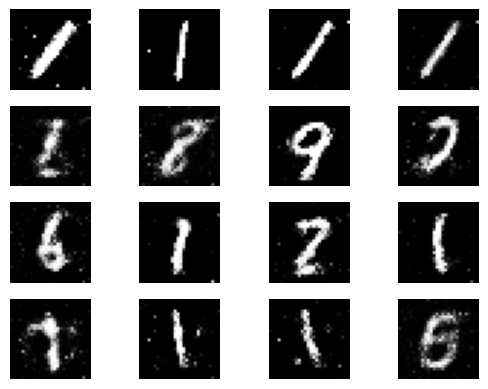

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Hyperparameters
latent_dim = 100
batch_size = 64
lr = 0.0002
epochs = 50

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

# Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(z.size(0), 1, 28, 28)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(img.size(0), -1))

# Initialize models
generator = Generator(latent_dim).to('cuda')
discriminator = Discriminator().to('cuda')

# Loss and optimizer
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(data_loader):
        real_imgs = imgs.to('cuda')
        batch_size = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to('cuda')
        fake_labels = torch.zeros(batch_size, 1).to('cuda')

        # Train generator
        z = torch.randn(batch_size, latent_dim).to('cuda')
        generated_imgs = generator(z)
        g_loss = criterion(discriminator(generated_imgs), real_labels)
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Train discriminator
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(generated_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

# Save generator output
import matplotlib.pyplot as plt
z = torch.randn(16, latent_dim).to('cuda')
generated_imgs = generator(z).cpu().detach()
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()
